C:\Users\Peter\AppData\Local\Temp\ipykernel_17216\2029864025.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


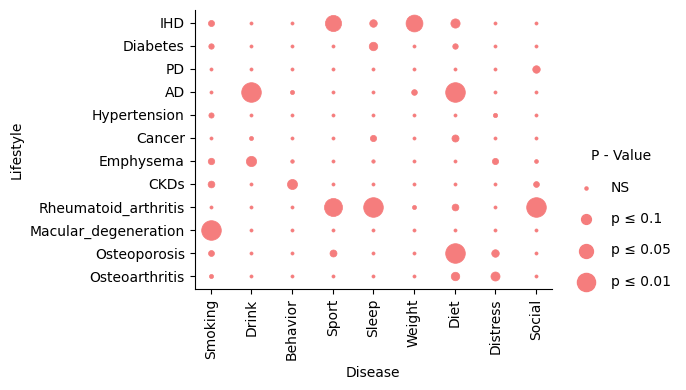

In [ ]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerPathCollection

# Read CSV file
df = pd.read_csv('../data/LifeStyle-Diseases_p-value.csv')

# Set first column as index
df.set_index(df.columns[0], inplace=True)

# Reshape data from wide to long format for bubble plot
bubble_data = df.reset_index().melt(id_vars=df.index.name or 'index', 
                                    var_name='Lifestyle', 
                                    value_name='p_value')
# Rename first column to 'Disease' for clarity
bubble_data.rename(columns={bubble_data.columns[0]: 'Disease'}, inplace=True)

# Calculate bubble sizes based on p-value significance
bubble_data['size'] = (-np.log10(bubble_data['p_value'])) ** 2.5 * 50

# Clip bubble sizes between 5 and 200 for visualization
bubble_data['size'] = np.clip(bubble_data['size'], 5, 200)

# Set uniform color for all bubbles
bubble_data['color'] = '#F57D7D'

# Create figure with specified dimensions
fig, ax = plt.subplots(figsize=(7, 4))

# Plot each bubble individually for precise control
for _, row in bubble_data.iterrows():
    ax.scatter(
        row['Disease'], row['Lifestyle'],
        s=row['size'],
        color=row['color'],
        linewidth=0.5
    )

# Rotate x-axis labels 90 degrees for readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Set axis labels
ax.set_xlabel('Disease')
ax.set_ylabel('Lifestyle')

# Invert y-axis to show most important factors at top
ax.invert_yaxis()

# Remove top and right spines for cleaner look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Create legend elements showing different bubble sizes
legend_elements = [
    ax.scatter([], [], s=5, color='#F57D7D', label='NS'),
    ax.scatter([], [], s=50, color='#F57D7D', label='p ≤ 0.1'),
    ax.scatter([], [], s=100, color='#F57D7D', label='p ≤ 0.05'),
    ax.scatter([], [], s=170, color='#F57D7D', label='p ≤ 0.01')
]

# Add legend to plot
ax.legend(
    handles=legend_elements,
    frameon=False,
    title='P - Value',
    bbox_to_anchor=(1.02, 0.25),
    loc='center left',
    labelspacing=1.25,
)

# Adjust layout to prevent clipping
plt.tight_layout()

# Display the plot
plt.show()